### Random Vector/Vetor aleatório
https://www.probabilitycourse.com/chapter6/6_1_5_random_vectors.php <br>
When dealing with multiple random variables, it is sometimes useful to use vector and matrix notations. When we have n random variables X1, X2, ..., Xn we can put them in a (column) vector X <br>
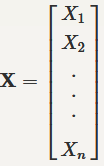
- We call X a **random vector**. Here X is an n-dimensional vector because it consists of n random variables. 

### Loss Function/Função de Custo
The function we want to minimize or maximize is called the **objective function** or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function.
- The loss function is the function that computes the distance between the current output of the algorithm and the expected output.
- Cross-entropy and mean squared error are the two main types of loss functions to use when training neural network models.
- At its core, a loss function is incredibly simple: It’s a method of evaluating how well your algorithm models your dataset. If your predictions are totally off, your loss function will output a higher number. If they’re pretty good, it’ll output a lower number. As you change pieces of your algorithm to try and improve your model, your loss function will tell you if you’re getting anywhere.

### Modelo de Regressão Linear
https://matheusfacure.github.io/2017/03/03/func-custo-regr/#func-obj <br>
Nos modelos de regressões lineares, queremos saber uma função $F(x)$ que possa predizer um valor de saída Y dado um valor x. O modelo exige uma função de custo: a mais comum é o erro quadrático médio: $$L=(y - \hat{y})^{2}$$
#### Implementando no Pytorch
https://www.tutorialspoint.com/pytorch/pytorch_linear_regression.htm <br>
Considerando uma função linear do tipo $F(x) = A \cdot x + B$ onde 'x' é a variável independente, 'y' é a variável dependente, 'A' é o coeficiente angular e 'B' é o coeficiente linear, vamos aplicar um modelo de regressão linear em um conjunto de dados gerados aleatoriamente.

1. Vamos importar as bibliotecas 'numpy', 'matplotlib' e 'pandas':

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

2. Atribuindo valores para os coeficientes e utilizando 'np.random.rand(256)' para criar os 256 valores aleatórios de [0~1] que irá compor os dados de x.

In [15]:
A = 2 # coeficiente angular
B = 3 # intercept
x = np.random.rand(256)

print(type(x))

noise = np.random.randn(256) / 4

y = A * x + B + noise


<class 'numpy.ndarray'>


TypeError: plot got an unexpected keyword argument 'x'

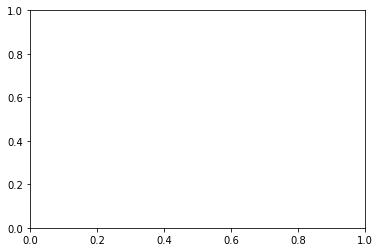

In [18]:
A = 2 # coeficiente angular
B = 3 # intercept
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = A * x + B + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

plt.figure()
plt.plot(x ='x', y ='y')
plt.show()

In [20]:
import torch
import torch.nn as nn
from torch.autograd import Variable
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

class LinearRegressionModel(nn.Module):
   def __init__(self, input_dim, output_dim):
      super(LinearRegressionModel, self).__init__()
      self.linear = nn.Linear(input_dim, output_dim)

   def forward(self, x):
      out = self.linear(x)
      return out
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
input_dim, output_dim(1, 1)
model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
[w, b] = model.parameters()

def get_param_values():
   return w.data[0][0], b.data[0]

def plot_current_fit(title = ""):
    plt.figure(figsize = (12,4))
    plt.title(title)
    plt.scatter(x, y, s = 8)
    w1 = w.data[0][0]
    b1 = b.data[0]
    x1 = np.array([0., 1.])
    y1 = x1 * w1 + b1
    plt.plot(x1, y1, 'r', label = 'Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()
    plot_current_fit('Before training')

TypeError: 'int' object is not callable